In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import normalize

In [2]:
sess_cpu = tf.Session(config=tf.ConfigProto(device_count={'GPU': 0}))
mnist = tf.keras.datasets.mnist
(trainx,trainy),(testx,testy)=mnist.load_data()

trainx=trainx.reshape(trainx.shape[0],trainx.shape[1],trainx.shape[2],1).astype('float32')
testx=testx.reshape(testx.shape[0],testx.shape[1],testx.shape[2],1).astype('float32')

trainy=tf.keras.utils.to_categorical(trainy,10)
testy=tf.keras.utils.to_categorical(testy,10)

In [3]:
filter_input=(5,5)
filter_hidden=(5,5)
data_format='channels_last'
pool=(2,2)

trainx/=255
testx/=255


In [4]:
model=keras.Sequential()

model.add(keras.layers.Conv2D(20,filter_input,activation='relu'))
model.add(keras.layers.MaxPool2D(pool))
model.add(keras.layers.Conv2D(50,filter_hidden,activation='relu'))
model.add(keras.layers.MaxPool2D(pool))



model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(500,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [5]:
history=model.fit(trainx,trainy,validation_data=(testx,testy),epochs=50,batch_size=50)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 8s 138us/step - loss: 0.1264 - acc: 0.9612 - val_loss: 0.0497 - val_acc: 0.9831
Epoch 2/50
60000/60000 [==============================] - 7s 109us/step - loss: 0.0401 - acc: 0.9878 - val_loss: 0.0365 - val_acc: 0.9885
Epoch 3/50
60000/60000 [==============================] - 7s 113us/step - loss: 0.0258 - acc: 0.9917 - val_loss: 0.0338 - val_acc: 0.9890
Epoch 4/50
60000/60000 [==============================] - 7s 114us/step - loss: 0.0202 - acc: 0.9936 - val_loss: 0.0305 - val_acc: 0.9906
Epoch 5/50
60000/60000 [==============================] - 7s 112us/step - loss: 0.0154 - acc: 0.9953 - val_loss: 0.0317 - val_acc: 0.9907
Epoch 6/50
60000/60000 [==============================] - 8s 134us/step - loss: 0.0123 - acc: 0.9961 - val_loss: 0.0306 - val_acc: 0.9915
Epoch 7/50
60000/60000 [==============================] - 8s 127us/step - loss: 0.0101 - acc: 0.9969 - val_loss: 0.0330 - 

KeyboardInterrupt: 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  520       
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  25050     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 multiple                  0         
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  400500    
_________________________________________________________________
dense_1 (Dense)              multiple                  5010      
Total para

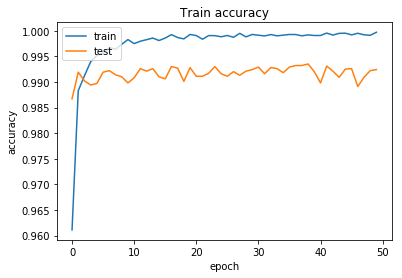

In [6]:
model.summary()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [7]:
print(history.history['acc'])

[0.9611000018008053, 0.9882833370566368, 0.9912000039219856, 0.9939500033855438, 0.9951666698853174, 0.9957000026106835, 0.9967000026007493, 0.9963833359877269, 0.9973500020305316, 0.9982666681706905, 0.9974833351870378, 0.9979500016073386, 0.9982500014205774, 0.9985666677355767, 0.9980833348631859, 0.9985666677852472, 0.9992333340148131, 0.9986666679382324, 0.9984000012775263, 0.9992666672666868, 0.9990500006576379, 0.99833333487312, 0.99905000085632, 0.9990333341062069, 0.9988166676958402, 0.9990666675567627, 0.9987166677912076, 0.9994833337763945, 0.998800001045068, 0.9992666673163573, 0.9991166674097379, 0.9989833342035611, 0.9992500006159146, 0.9990000007549922, 0.9991333341101806, 0.9992666673660279, 0.9992500007152557, 0.9990000009040038, 0.9991833340128263, 0.9990666675567627, 0.9990666675070922, 0.9995333337783814, 0.9991500007609526, 0.999483333826065, 0.9995166671276092, 0.9991833341121673, 0.9995000004768372, 0.9992000007132689, 0.9991000007589658, 0.9997000002364318]


In [17]:
f=open("Accuracy MNIST_keras","a")
for i in range(50):
    acc=str(history.history['acc'][i]*100)
    to_write=str(i)+"\t"+acc
    f.write(to_write)
    f.write("\n")
    print(to_write)
f.close()
    

0	96.11000018008053
1	98.82833370566368
2	99.12000039219856
3	99.39500033855438
4	99.51666698853174
5	99.57000026106834
6	99.67000026007493
7	99.63833359877269
8	99.73500020305316
9	99.82666681706905
10	99.74833351870377
11	99.79500016073386
12	99.82500014205775
13	99.85666677355766
14	99.80833348631859
15	99.85666677852471
16	99.9233334014813
17	99.86666679382324
18	99.84000012775263
19	99.92666672666869
20	99.9050000657638
21	99.833333487312
22	99.905000085632
23	99.90333341062069
24	99.88166676958402
25	99.90666675567627
26	99.87166677912076
27	99.94833337763946
28	99.8800001045068
29	99.92666673163572
30	99.91166674097379
31	99.89833342035611
32	99.92500006159146
33	99.90000007549922
34	99.91333341101806
35	99.92666673660278
36	99.92500007152557
37	99.90000009040038
38	99.91833340128264
39	99.90666675567627
40	99.90666675070922
41	99.95333337783813
42	99.91500007609527
43	99.9483333826065
44	99.95166671276093
45	99.91833341121674
46	99.95000004768372
47	99.92000007132688
48	99.9100